In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')
from analysis.analysis_utils import *
from analysis.plot_utils import *
import numpy as np
import pandas as pd



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
debate_run_id = 'suu380s'
df = prepare_df(['debates'])
df = df[df['run_id_debates'] == debate_run_id]
df.shape

/Users/joshlevy/projects/llm_judge_debate_NEW/analysis/../analysis/analysis_utils.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(aligned_dfs, ignore_index=True)


(197, 49)

In [4]:
correct_debater_response_times = []
incorrect_debater_response_times = []
from collections import defaultdict
correct_by_turn_dict = defaultdict(list)
incorrect_by_turn_dict = defaultdict(list)
for idx, row in df.iterrows():
    correct_idx = row['correct_idx_debates']
    num_correct_turns = 0
    num_incorrect_turns = 0
    for turn in row['debate_history_debates']:
        if turn['debater_idx'] == correct_idx:
            correct_debater_response_times.append(turn['response_time'])
            correct_by_turn_dict[num_correct_turns].append(turn['response_time'])
            num_correct_turns += 1
        elif turn['debater_idx'] != correct_idx:
            incorrect_debater_response_times.append(turn['response_time'])
            incorrect_by_turn_dict[num_incorrect_turns].append(turn['response_time'])
            num_incorrect_turns += 1
correct_debater_response_times = pd.Series(correct_debater_response_times)
incorrect_debater_response_times = pd.Series(incorrect_debater_response_times)

In [5]:
incorrect_debater_response_times.shape

(788,)

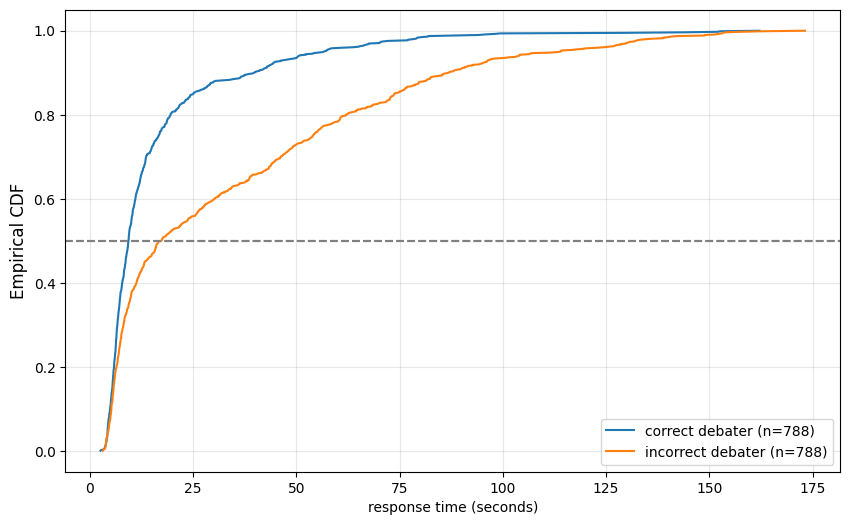

In [13]:
ax = cdf((correct_debater_response_times, incorrect_debater_response_times), labels=['correct debater', 'incorrect debater'])
ax.legend()
plt.xlabel('response time (seconds)')
plt.show()

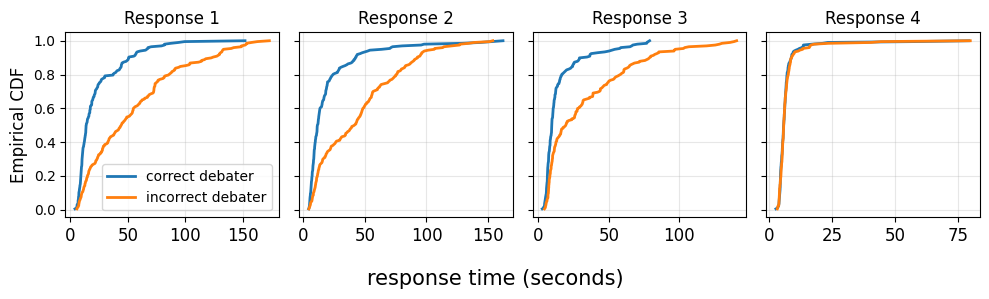

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(10, 3), sharey=True)

num_turns_per_debater = max(correct_by_turn_dict)
for i in range(num_turns_per_debater + 1):
    cdf((pd.Series(correct_by_turn_dict[i]), pd.Series(incorrect_by_turn_dict[i])), labels=['correct debater', 'incorrect debater'], ax=ax[i])
    ax[i].set_title(f'Response {i+1}')
ax[0].set_ylabel('Empirical CDF', fontsize=12)
fig.supxlabel('response time (seconds)', fontsize=15, y=0.02)
plt.tight_layout()

# ax[0].legend(handles=legend_elements, loc='lower right', fontsize=12)
ax[0].legend(['correct debater', 'incorrect debater'], loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()
    

In [70]:
max(correct_by_turn_dict)

4